In [9]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import functions.eddy_feedback as ef

In [10]:
nao = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/annular_modes/MSLP_SAM/data/pamip_misc/aao_variance_info.csv')
efp = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/daily_efp_8models+jra55.csv', index_col=0)
df = pd.merge(nao, efp)
df

,model,variance,efp_nh,efp_sh
0,AWI-CM-1-1-MR,3.95,0.2592,0.2557
1,CNRM-CM6-1,5.59,0.2244,0.1944
2,CanESM5,3.52,0.3133,0.3271
3,FGOALS-f3-L,1.71,0.2353,0.1273
4,HadGEM3-GC31-LL,3.04,0.1735,0.1729
5,HadGEM3-GC31-MM,2.80,0.2525,0.1874
6,IPSL-CM6A-LR,3.70,0.2623,0.2015
7,JRA55,29.75,0.3872,0.2116
8,MIROC6,2.34,0.1592,0.2058


In [11]:
jra = df.loc[df['model'] == 'JRA55'].copy().reset_index(drop=True)
pamip = df.loc[df['model'] != 'JRA55'].copy().reset_index(drop=True)
df

,model,variance,efp_nh,efp_sh
0,AWI-CM-1-1-MR,3.95,0.2592,0.2557
1,CNRM-CM6-1,5.59,0.2244,0.1944
2,CanESM5,3.52,0.3133,0.3271
3,FGOALS-f3-L,1.71,0.2353,0.1273
4,HadGEM3-GC31-LL,3.04,0.1735,0.1729
5,HadGEM3-GC31-MM,2.80,0.2525,0.1874
6,IPSL-CM6A-LR,3.70,0.2623,0.2015
7,JRA55,29.75,0.3872,0.2116
8,MIROC6,2.34,0.1592,0.2058


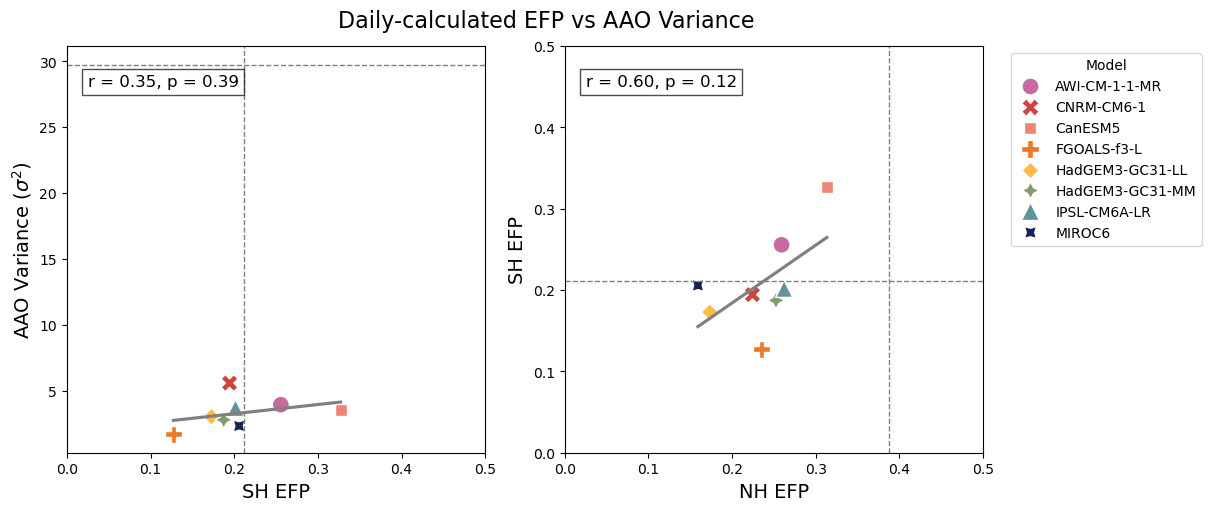

In [12]:
from pypalettes import load_cmap

# Load colormap and set up palette
cmap = load_cmap("Cross")
models = df['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Plot 1: EFP NH vs Variance
sns.regplot(ax=axes[0], data=pamip, x='efp_sh', y='variance', scatter_kws={'color': 'white'}, 
            line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[0], data=pamip, x='efp_sh', y='variance', hue='model', style='model', 
                s=150, palette=palette)

r, p = sp.stats.pearsonr(y=pamip['variance'], x=pamip['efp_sh'])
axes[0].text(.05, .9, f"r = {r:.2f}, p = {p:.2f}", transform=axes[0].transAxes, 
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

axes[0].set_ylabel('AAO Variance ($\\sigma^2$)', fontsize=14)
axes[0].set_xlabel('SH EFP', fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].axvline(jra['efp_sh'].values[0], color='gray', linestyle='--', linewidth=1)
axes[0].axhline(jra['variance'].values[0], color='gray', linestyle='--', linewidth=1)
axes[0].legend_.remove()

# Plot 2: EFP SH vs EFP NH
sns.regplot(ax=axes[1], data=pamip, x='efp_nh', y='efp_sh', scatter_kws={'color': 'white'}, 
            line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[1], data=pamip, x='efp_nh', y='efp_sh', hue='model', style='model', 
                s=150, palette=palette)

r, p = sp.stats.pearsonr(x=pamip['efp_sh'], y=pamip['efp_nh'])
axes[1].text(.05, .9, f"r = {r:.2f}, p = {p:.2f}", transform=axes[1].transAxes, 
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

axes[1].set_ylabel('SH EFP', fontsize=14)
axes[1].set_xlabel('NH EFP', fontsize=14)
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].axvline(jra['efp_nh'].values[0], color='gray', linestyle='--', linewidth=1)
axes[1].axhline(jra['efp_sh'].values[0], color='gray', linestyle='--', linewidth=1)

axes[1].legend(bbox_to_anchor=(1.05, 1), title='Model')

fig.suptitle('Daily-calculated EFP vs AAO Variance', fontsize=16, x=0.45)
plt.show()